# Problema 4.8
###  Reactor de membrana
"Elementos de Ingeniería de las reacciones químicas" ,Scott Fogler capitulo 4, página 211

![newnotebook](../imágenes/problema4.8.png)

Primero importaremos la librerías que nos ayudaran a resolver el problema (No olvides activar las librerías con **Shift+enter**):

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def model(F, V):
    """
    Model for a membrane reactor
    :param F: Flows (A, B, C)
    :param V: Volume of reactor (dm3)
    :return: ODE system
    """
    Fa, Fb, Fc = F[0], F[1], F[2]
    kc = 0.2
    Cto = 0.2
    Ft = Fa + Fb + Fc
    k = 0.7
    Kc = 0.05
    ra = -k*Cto*((Fa/Ft)-Cto/Kc*(Fb/Ft)*(Fc/Ft))
    dFadV = ra
    dFbdV = -ra-kc*Cto*Fb/Ft
    dFcdV = -ra
    return [dFadV, dFbdV, dFcdV]


In [3]:
# Condiciones iniciales
F0 = [10, 0, 0]

# Volúmen
V = np.linspace(0, 500, 500)

# Solución de ODES
F = odeint(model, F0, V)

Fa = F[:, 0]
Fb = F[:, 1]
Fc = F[:, 2]
print('Fa final = ', Fa[-1])

Fa final =  3.9951787094153355


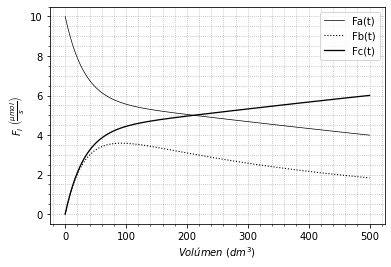

In [4]:
# Graficando solución de ODES
fig = plt.figure()
ax = fig.add_subplot(111)
ax.minorticks_on()
ax.plot(V, Fa, 'black', linewidth=0.7, label='Fa')
ax.plot(V, Fb, 'k:', linewidth=1.1, label='Fb')
ax.plot(V, Fc, 'black', linewidth=1.3, label='Fc')
ax.set_xlabel('$Volúmen \\ (dm^3)$')
ax.set_ylabel('$F_i \\ \\left( \\frac{\\mu mol}{s} \\right)$')
ax.grid(which='BOTH', ls=':')
ax.grid(True)
ax.legend(['Fa(t)', 'Fb(t)', 'Fc(t)'])
plt.show()